In [8]:
%load_ext autoreload
%autoreload 2
from cieran import Cieran
import seaborn as sns
import numpy as np
sns.set_theme(style="white")
rs = np.random.RandomState(50)
import matplotlib.pyplot as plt

x, y = rs.normal(size=(2, 50))
def draw_kde(cmap):
    # Set up the matplotlib figure
    fig, ax = plt.subplots()
    sns.kdeplot(x=x, y=y, cmap=cmap, ax=ax, fill=True, clip=(-5, 5), cut=10, thresh=0, levels=9)
    # Adjust aspect ratio to be equal
    ax.set_aspect('equal')

    ax.set_axis_off()
    ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
    plt.tight_layout()
    
    plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
cie = Cieran(palette='tableau10', draw=draw_kde)

Output()

In [10]:
cie.teach()

IntProgress(value=1, layout=Layout(height='36px', margin='8px', width='auto'), max=15, style=ProgressStyle(bar…

Output()

Which is better for a paper figure? Enter a number (1: left, 2: right, 0: about equal): q


ValueError: invalid literal for int() with base 10: 'q'

In [12]:
cie.search()

IntProgress(value=0, layout=Layout(height='36px', margin='8px', width='auto'), max=20000)

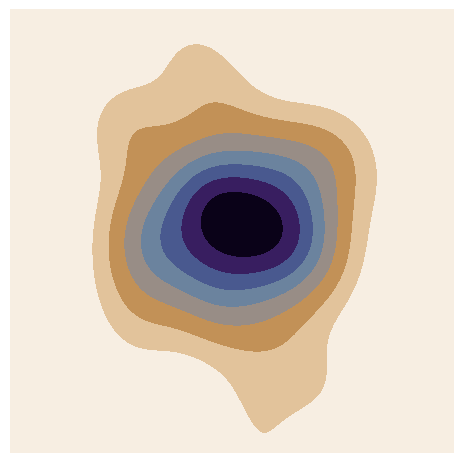

In [14]:
draw_kde(cie.search_result.ramp)

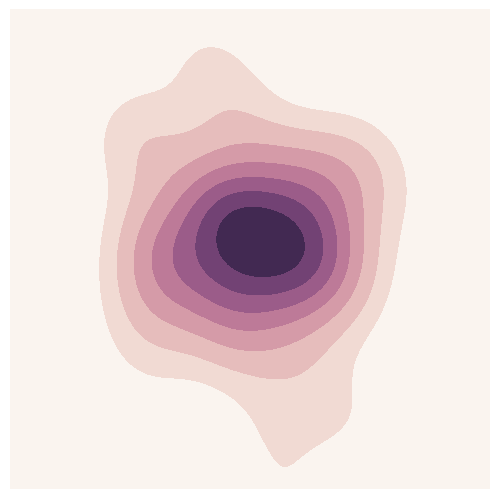

In [79]:
draw_figure(sns.cubehelix_palette(start=15, light=1, as_cmap=True))

In [3]:
import numpy as np
rs = np.random.RandomState(50)

In [1]:
%load_ext autoreload
%autoreload 2

In [112]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML
from matplotlib.colors import ListedColormap

# Define the gradient styles using the provided color maps
cmap1 = ['#ff0000', '#ffff00', '#00ff00', '#00ffff']
cmap2 = ['#0000ff', '#ff00ff', '#ff0000']
cmap3 = ['#00ff00', '#ffff00', '#ff00ff', '#0000ff']
cmap4 = ['#00ffff', '#ff00ff', '#ffff00', '#0000ff']

gradient_styles = []
for cmap in [cmap1, cmap2, cmap3, cmap4]:
    color_stops = ','.join(cmap)
    gradient_styles.append(f'background: linear-gradient(to right, {color_stops}); color: white; border-color: transparent; border-radius: 5px;')

style="""
    <style>
        .style_a {background-color:#fafaaa}
        .style_b {background-color:#faaafa}
        .style_c {background-color:#aafafa}
    </style>
"""
display(HTML(style))

# Create the dropdown widget for the gradient styles
gradient_dropdown = widgets.RadioButtons(
    options=[i for i in range(len(gradient_styles))], 
    layout=widgets.Layout(width='auto'))

gradient_dropdown.add_class('style_a')
    
# Create the widgets for the column
chart_output = widgets.Output(layout=widgets.Layout(height='600px'))

# Define the function to update the gradient style and chart when the dropdown value changes
def update_gradient_style(change):
    gradient_index = change['new']
    cmap = [cmap1, cmap2, cmap3, cmap4][gradient_index]
    gradient_style = gradient_styles[gradient_index]
    with chart_output:
        chart_output.clear_output()
        draw_figure(ListedColormap(cmap))
    gradient_dropdown.style.background = gradient_style

# Initialize the dropdown with the first gradient style
update_gradient_style({'new': 0})

# Connect the function to the dropdown value change event
gradient_dropdown.observe(update_gradient_style, names='value')

# Combine the two rows into a single column
column = widgets.HBox([gradient_dropdown, chart_output])

# Display the column
display(column)

